# **Principal Component Analysis (PCA)**

PCA stands for Principal Component Analysis. It is a statistical technique used to reduce the dimensionality of data while preserving most of its original variation.

PCA works by transforming the original variables into a new set of variables, called principal components, which are linear combinations of the original variables. These principal components are ordered in such a way that the first principal component explains the maximum variance in the data, the second principal component explains the maximum variance remaining after the first component, and so on.

By retaining only the most important principal components (those that capture the most variance), PCA helps to simplify the data while minimizing information loss. It is commonly used for data visualization, noise reduction, feature extraction, and speeding up machine learning algorithms by reducing the number of input variables.


## **PCA for Feature Engineering**

There are two ways you could use PCA for feature engineering.

The first way is to use it as a descriptive technique. Since the components tell you about the variation, you could compute the MI scores for the components and see what kind of variation is most predictive of your target.

The second way is to use the components themselves as features. Because the components expose the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

**Dimensionality reduction:** When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.

**Anomaly detection:** Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.

**Noise reduction:** A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.

**Decorrelation:** Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

PCA basically gives you direct access to the correlational structure of your data.

In this instance, the Automobile dataset (https://www.kaggle.com/datasets/toramky/automobile-dataset) from Kaggle was utilized to apply Principal Component Analysis (PCA) as a descriptive technique for feature discovery.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

In [34]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

<ipython-input-34-78cecd13522c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [35]:
df = pd.read_csv("/content/sample_data/Automobile_data (1).csv")

In [36]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

print(null_values)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We've selected three features that cover a range of properties. Each of these features also has a high MI score with the target, price. We'll standardize the data since these features aren't naturally on the same scale.

In [38]:
features = ["highway-mpg", "engine-size","curb-weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled

,highway-mpg,engine-size,curb-weight
0,-0.544725,0.074267,-0.014531
1,-0.544725,0.074267,-0.014531
2,-0.689938,0.602571,0.513625
3,-0.109087,-0.430023,-0.419770
4,-1.270789,0.218350,0.515545
...,...,...,...
200,-0.399512,0.338419,0.761377
201,-0.835151,0.338419,0.947672
202,-1.125577,1.106861,0.876611
203,-0.544725,0.434474,1.270327


Now we can fit scikit-learn's PCA estimator and create the principal components. You can see here the first few rows of the transformed dataset.

In [39]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3
0,0.337894,-0.372875,-0.221911
1,0.337894,-0.372875,-0.221911
2,1.038570,-0.091846,-0.125912
3,-0.437361,-0.402075,-0.141693
4,1.143997,-0.779971,-0.106238


The code here, calculates and displays the loadings of the principal components obtained from a Principal Component Analysis (PCA) on a dataset. Loadings represent the correlation between the original features and the principal components, indicating how much each feature contributes to each principal component.

In this specific context, the `loadings` DataFrame contains this information, with rows corresponding to original features and columns representing principal components. By transposing the matrix of loadings (`pca.components_.T`), the DataFrame is structured to show how each feature influences each principal component. This analysis helps in understanding which features have the most significant impact on each principal component and how they contribute to the overall variance in the data.

Printing and examining the `loadings` DataFrame provides insights into the relationships between the original features and the derived principal components, aiding in feature interpretation, dimensionality reduction, and identifying key patterns within the data.

In [40]:
# Get the loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns[:n_components],  # use only the relevant number of original features
)

print(loadings)

                  PC1       PC2       PC3
highway-mpg -0.558256  0.767581  0.314912
engine-size  0.572561  0.631119 -0.523319
curb-weight  0.600436  0.111840  0.791813


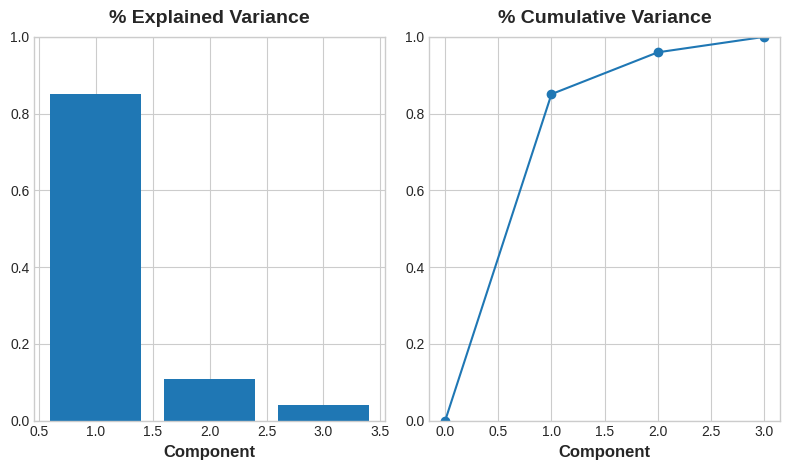

In [41]:
# Look at explained variance
plot_variance(pca);

Interpreting the given MI scores:

- PC1 has the highest MI score of 0.995924, indicating that it has the strongest relationship with the target variable.
- PC2 has a lower MI score of 0.326103, suggesting a weaker but still meaningful relationship with the target.
- PC3 has the lowest MI score of 0.190734, implying a relatively weak relationship with the target variable.

These MI scores can be used to determine the importance of each principal component in predicting the target variable. The principal component with the highest MI score (PC1) would be the most important, followed by PC2 and then PC3. This information can guide feature selection and model development decisions.


In [42]:
import numpy as np

# Convert '?' to NaN
y = y.replace('?', np.nan)

# Impute missing values in y
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Calculate mutual information scores
mi_scores = make_mi_scores(X_pca, y_imputed, discrete_features=False)
mi_scores

PC1    0.996578
PC2    0.325999
PC3    0.189930
Name: MI Scores, dtype: float64